In [2]:
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;
import json;
import csv;
from datetime import datetime;

# Critical field diagram with varying $\Delta_0$ and $\mu$ and fixed $T$

In [127]:
# Obtain critical fields as function of mu and Delta0 for fixed T:
material = "WS2";
MoX = SC.TMDmonolayerSC(material=material);

muMin = 0.06;
muMax = 0.25;
Delta0Min = 0.25e-4;
Delta0Max = 0.5e-3;
res = 500;

T = 0.0;
nMu = 50;
nDelta0 = 50;
hwcDeltaRatio = 20.0;
reltol = 1e-11;
transition = 1e-2;
pauliUnits = True;

minfactor = 0;
maxfactor = 300;

z, x, y = MoX.Bcgrid(muMin, muMax, Delta0Min, Delta0Max, res, T=T, nMu=nMu, nDelta0=nDelta0, hwcDeltaRatio=hwcDeltaRatio, minfactor=minfactor, maxfactor=maxfactor,
                     reltol=reltol, transition=transition, pauliUnits=pauliUnits);

/home/kevin/Documenten/Applied physics Delft/Thesis/Major rotation TMD/IsingSC/analysis/manuscript code/TMDmonolayerSuperconductor.py:105: RuntimeWarning: invalid value encountered in sqrt
  sqrtmin = np.sqrt(Esqmin + Fsqmin + Hext**2 + Delta**2 - 2*np.sqrt(Esqmin*(Fsqmin + Hext**2) + Delta**2 * Hext**2));
/home/kevin/Documenten/Applied physics Delft/Thesis/Major rotation TMD/IsingSC/analysis/manuscript code/TMDmonolayerSuperconductor.py:108: RuntimeWarning: invalid value encountered in greater_equal
  minfilter = sqrtmin >= 2*T*7e2;


In [128]:
# save data:
with open("results/Bcdata_constT_{}_{}.json".format(material, datetime.now().strftime('%Y-%m-%d_%H:%M:%S')), "w+") as f:
    jsoncontent = {"x": x.tolist(), "y": y.tolist(), "z": z.tolist(), "muMin": muMin, "muMax": muMax, "Delta0Min": Delta0Min, "Delta0Max": Delta0Max, "res": res,
                   "T": T, "nMu": nMu, "nDelta0": nDelta0, "hwcDeltaRatio": hwcDeltaRatio, "reltol": reltol, "transition": transition,
                   "pauliUnits": pauliUnits};
    json.dump(jsoncontent, f);

In [225]:
# load data:
material = "WS2";
with open("results/Bcdata_constT_{}_{}.json".format(material, "2020-03-06_12:19:57"), "r") as f:
    jsoncontent = json.load(f);

x = jsoncontent["x"];
y = jsoncontent["y"];
z = jsoncontent["z"];
muMin = jsoncontent["muMin"]; print("muMin = {}".format(muMin));
muMax = jsoncontent["muMax"]; print("muMax = {}".format(muMax));
Delta0Min = jsoncontent["Delta0Min"]; print("Delta0Min = {}".format(Delta0Min));
Delta0Max = jsoncontent["Delta0Max"]; print("Delta0Max = {}".format(Delta0Max));
nMu  = jsoncontent["nMu"];
nDelta0 = jsoncontent["nDelta0"];
# For convenience, I list the most recent result data names here:
# MoS2: 2020-03-04_22:32:15
# MoSe2: 2020-03-03_17:55:02
# MoTe2: 2020-03-03_20:50:11
# WS2: 2020-03-06_12:19:57

muMin = 0.06
muMax = 0.25
Delta0Min = 2.5e-05
Delta0Max = 0.0005


In [92]:
# Load experimental data to add in figure:

muDataAll = []; Delta0DataAll = []; # energies will end up in meV 
datasets = [];
for dataset in datasets:
    muData = []; Delta0Data = [];
    
    print("\nThe dataset {}".format(dataset));

    with open(dataset, newline='') as f:
        with open("material_params.json") as j:
            params = json.load(j)[material];

        csvlines = csv.reader(f, delimiter=',');
        for line in csvlines:
            muData.append( float(line[0])*params["A"]*10*np.pi ); # Assuming n2D is in units of 10^14 cm^-2
            Delta0Data.append( float(line[1])* 8.617333262145e-2 * 1.764 ); # Assuming Tc is in K
            print("mu = {} meV, Delta0 = {} meV".format(muData[-1], Delta0Data[-1]));

    muDataAll.append(muData); Delta0DataAll.append(Delta0Data);

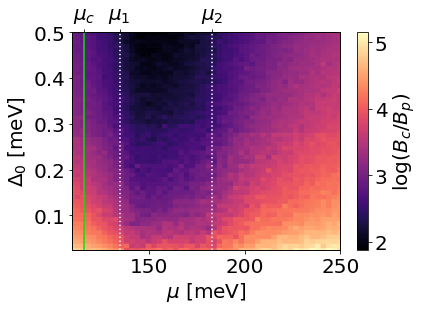

In [172]:
# Plot log(B_c / B_p):

# preparation for plot, correct x and y grid:
dx = (muMax - muMin) / (nMu - 1);
dy = (Delta0Max - Delta0Min) / (nDelta0 - 1);
xcorr, ycorr = np.meshgrid(np.linspace(muMin, muMax + dx, nMu + 1) - dx/2, np.linspace(Delta0Min, Delta0Max + dy, nDelta0 + 1) - dy/2, indexing='ij');

# plot the critical field diagram:
fig = plt.figure()
ax = fig.add_subplot(111, xlim=[muMin*1000,muMax*1000], ylim=[Delta0Min*1000,Delta0Max*1000]);
ax.tick_params(labelsize=20);
ax.set_xlabel(r"$\mu$ [meV]", size=20);
ax.set_ylabel(r"$\Delta_0$ [meV]", size=20);
quadmesh = ax.pcolormesh(xcorr*1000, ycorr*1000, np.log(z), cmap="magma", rasterized=True, antialiased=True);
cbar = fig.colorbar(quadmesh, ax=ax);
cbar.ax.tick_params(labelsize=20);
cbar.set_ticks(np.arange(0,7,1));
cbar.set_label(r"$\log(B_c / B_p)$", size=20);

# Include experimental data in plot:
dataset_colors = ['r','b'];
for i in range(len(datasets)):
    ax.scatter(muDataAll[i], Delta0DataAll[i], c=dataset_colors[i], edgecolors='k');

# Extra annotations:
twinax = ax.twiny();
labelnames = []; labelvalues = [];
with open("material_params.json") as f:
    params = json.load(f)[material];

if params["muc"] != None:
    ax.axvline(params["muc"], color=(0,0.9,0), linestyle='-');
    labelnames.append(r"$\mu_c$"); labelvalues.append(params["muc"]);
if params["mumin"] != None:
    ax.axvline(params["mumin"], color='w', linestyle=':');
    labelnames.append(r"$\mu_1$"); labelvalues.append(params["mumin"]);
    ax.axvline(params["mumax"], color='w', linestyle=':'); # we assume that the maximum is also available if the minimum is available.
    labelnames.append(r"$\mu_2$"); labelvalues.append(params["mumax"]);
twinax.set_xticks(labelvalues);
twinax.set_xticklabels(labelnames);
twinax.set_xlim(1000*muMin,1000*muMax);
twinax.tick_params(labelsize=20);

Delta0 = 0.3061224489795919 meV


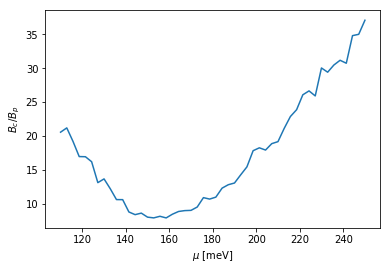

In [171]:
# Quick method to obtain cross section
index = 29;
print("Delta0 = {} meV".format(np.array(y)[0,index]*1000));

mus = np.array(x)[:,39]*1000;
hcs = np.array(z)[:,39];

plt.plot(mus, hcs);
plt.xlabel(r"$\mu$ [meV]");
plt.ylabel(r"$B_c / B_p$");

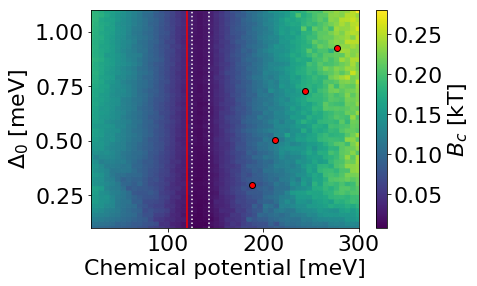

In [42]:
# Plot actual values of critical field

# preparation for plot, correct x and y grid:
dx = (muMax - muMin) / (nMu - 1);
dy = (Delta0Max - Delta0Min) / (nDelta0 - 1);
xcorr, ycorr = np.meshgrid(np.linspace(muMin, muMax + dx, nMu + 1) - dx/2, np.linspace(Delta0Min, Delta0Max + dy, nDelta0 + 1) - dy/2, indexing='ij');

# plot the critical field diagram:
fig = plt.figure()
ax = fig.add_subplot(111, xlim=[muMin*1000,muMax*1000], ylim=[Delta0Min*1000,Delta0Max*1000]);
ax.tick_params(labelsize=22);
ax.set_xlabel("Chemical potential [meV]", size=22);
ax.set_ylabel(r"$\Delta_0$ [meV]", size=22);
quadmesh = ax.pcolormesh(xcorr*1000, ycorr*1000, np.array(z)*np.array(y)/np.sqrt(2)/5.7883818012e-2, rasterized=True, antialiased=True);
cbar = fig.colorbar(quadmesh, ax=ax);
cbar.ax.tick_params(labelsize=22);
cbar.set_label(r"$B_c$ [kT]", size=22);

# Include experimental data in plot:
dataset_colors = ['r','b'];
for i in range(len(datasets)):
    ax.scatter(muDataAll[i], Delta0DataAll[i], c=dataset_colors[i], edgecolors='k');

# Extra annotations:
with open("material_params.json") as f:
    params = json.load(f)[material];

if params["muc"] != None:
    ax.axvline(params["muc"], color='r', linestyle='-');
if params["mumin"] != None:
    ax.axvline(params["mumin"], color='w', linestyle=':');
    ax.axvline(params["mumax"], color='w', linestyle=':'); # we assume that the maximum is also available if the minimum is available.

In [173]:
# Save figure
fig.tight_layout();
fig.savefig("results/Bcdata_constT_{}_{}.pdf".format(material, datetime.now().strftime('%Y-%m-%d_%H:%M:%S')));

# Critical field diagram with varying $\mu$ and $T$ and fixed $\Delta_0$

In [226]:
# Obtain critical fields as function of mu and T for fixed Delta0:
material = "WS2";
MoX = SC.TMDmonolayerSC(material=material);

muMin = 0.06;
muMax = 0.25;
Tmin = 0.0;
Tmax = 8.617333262145e-5 * 3.15 / 2;
res = 500;

Delta0 = 3.15 * 8.617333262145e-5 * 1.764 / 2;
nMu = 50;
nT = 50;
hwcDeltaRatio = 20.0;
reltol = 1e-11;
transition = 1e-2;
pauliUnits = True;

minfactor = 0;
maxfactor = 200;

z, x, y = MoX.Bcgrid_constDelta0(muMin, muMax, Tmin, Tmax, res, Delta0=Delta0, nMu=nMu, nT=nT, hwcDeltaRatio=hwcDeltaRatio, minfactor=minfactor, maxfactor=maxfactor,
                     reltol=reltol, transition=transition, pauliUnits=pauliUnits);

/home/kevin/Documenten/Applied physics Delft/Thesis/Major rotation TMD/IsingSC/analysis/manuscript code/TMDmonolayerSuperconductor.py:105: RuntimeWarning: invalid value encountered in sqrt
  sqrtmin = np.sqrt(Esqmin + Fsqmin + Hext**2 + Delta**2 - 2*np.sqrt(Esqmin*(Fsqmin + Hext**2) + Delta**2 * Hext**2));
/home/kevin/Documenten/Applied physics Delft/Thesis/Major rotation TMD/IsingSC/analysis/manuscript code/TMDmonolayerSuperconductor.py:108: RuntimeWarning: invalid value encountered in greater_equal
  minfilter = sqrtmin >= 2*T*7e2;


In [227]:
# save data:
with open("results/Bcdata_constDelta0_{}_{}.json".format(material, datetime.now().strftime('%Y-%m-%d_%H:%M:%S')), "w+") as f:
    jsoncontent = {"x": x.tolist(), "y": y.tolist(), "z": z.tolist(), "muMin": muMin, "muMax": muMax, "Tmin": Tmin, "Tmax": Tmax, "res": res,
                   "Delta0": Delta0, "nMu": nMu, "nT": nT, "hwcDeltaRatio": hwcDeltaRatio, "reltol": reltol, "transition": transition,
                   "pauliUnits": pauliUnits};
    json.dump(jsoncontent, f);

In [195]:
# load data:
material = "WS2";
with open("results/Bcdata_constDelta0_{}_{}.json".format(material, "2020-01-31_13:22:16"), "r") as f:
    jsoncontent = json.load(f);

x = jsoncontent["x"];
y = jsoncontent["y"];
z = jsoncontent["z"];
muMin = jsoncontent["muMin"];
muMax = jsoncontent["muMax"];
Tmin = jsoncontent["Tmin"];
Tmax = jsoncontent["Tmax"];
nMu  = jsoncontent["nMu"];
nT = jsoncontent["nT"];
Delta0 = jsoncontent["Delta0"];
# Again, I list the recent datasets for convenience:
# MoS2: 2020-03-07_15:56:18
# MoSe2: 2020-03-08_13:06:56
# MoTe2: 2020-03-08_15:31:31
# WS2: 2020-03-08_18:15:40

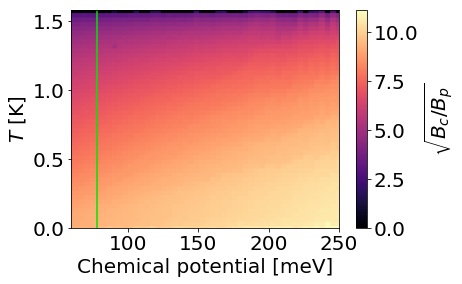

In [233]:
# plot sqrt(B_c / B_p):

# preparation for plot, correct x and y grid:
dx = (muMax - muMin) / (nMu - 1);
dy = (Tmax - Tmin) / (nT - 1);
xcorr, ycorr = np.meshgrid(np.linspace(muMin, muMax + dx, nMu + 1) - dx/2, np.linspace(Tmin, Tmax + dy, nT + 1) - dy/2, indexing='ij');

# plot the critical field diagram:
fig = plt.figure();
ax = fig.add_subplot(111, xlim=[muMin*1000,muMax*1000], ylim=[Tmin/8.617333262145e-5,Tmax/8.617333262145e-5]);
ax.tick_params(labelsize=20);
ax.set_xlabel("Chemical potential [meV]", size=20);
ax.set_ylabel(r"$T$ [K]", size=20);
quadmesh = ax.pcolormesh(xcorr*1000, ycorr/8.617333262145e-5, np.sqrt(z), cmap="magma", rasterized=True, antialiased=True);
cbar = fig.colorbar(quadmesh, ax=ax);
cbar.ax.tick_params(labelsize=20);
cbar.set_ticks(np.arange(0,13,2.5));
cbar.set_label(r"$\sqrt{B_c / B_p}$", size=20);

# Extra annotations:
#twinax = ax.twiny();
labelnames = []; labelvalues = [];
with open("material_params.json") as f:
    params = json.load(f)[material];

if params["muc"] != None:
    ax.axvline(params["muc"], color=(0,0.9,0), linestyle='-');
    labelnames.append(r"$\mu_c$"); labelvalues.append(params["muc"]);
if params["mumin"] != None:
    ax.axvline(params["mumin"], color='w', linestyle=':');
    labelnames.append(r"$\mu_1$"); labelvalues.append(params["mumin"]);
    ax.axvline(params["mumax"], color='w', linestyle=':'); # we assume that the maximum is also available if the minimum is available.
    labelnames.append(r"$\mu_2$"); labelvalues.append(params["mumax"]);
#twinax.set_xticks(labelvalues);
#twinax.set_xticklabels(labelnames);
#twinax.set_xlim(1000*muMin,1000*muMax);
#twinax.tick_params(labelsize=20);

In [234]:
# Save figure:
fig.tight_layout();
fig.savefig("results/fig_Bcdata_constDelta0_{}_{}.pdf".format(material, datetime.now().strftime('%Y-%m-%d_%H:%M:%S')));

# Critical field as function of $T$ for fixed $\mu$ and $\Delta_0$

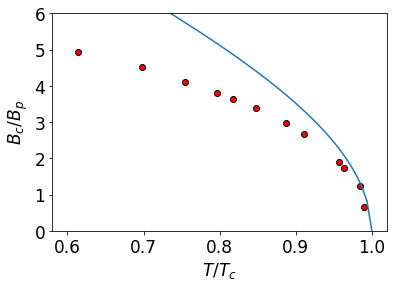

In [19]:
# Critical field diagram for MoS2, comparing with experimental data from Lu et al.
material = "MoS2";
SCmonolayer = SC.TMDmonolayerSC(material=material);

# Lu et al. indicates the critical temperature of a sample, this can be used to derive Delta_0 of the sample:
Tc = 2.37 * 8.617333262145e-5; # in eV
Delta0 = 1.764 * Tc; # in eV

# From the dataset we also know what the corresponding chemical potential should be:
mu = 0.15548513956371684; # in eV

# Some other parameters:
hwc = 20.0 * Delta0;
res = 500;

# Now we calculate the critical field for different critical field:
ksplus, ksmin = SCmonolayer.generate_ks(mu, hwc, res);
V = SCmonolayer.Vint(mu, ksplus, ksmin, Delta0);

Ts = np.linspace(Tc*0.6, Tc, 64);
Bcs = [];
for T in Ts:
    print("Evaluating for T = {0:.4f} Tc...".format(T/Tc), end="\r");
    Bcs.append( SCmonolayer.findBc(mu, Delta0, ksplus, ksmin, V, T=T) );
    
# Include experimental data:
Tdata = []; Bcdata = [];
with open("LuMoS2_T-B.csv", newline='') as f:
    csvlines = csv.reader(f, delimiter=',');
    for line in csvlines:
        Tdata.append( float(line[0]) );
        Bcdata.append( float(line[1]) );

In [16]:
# Critical field diagram for WS2, comparing with experimental data from Lu et al.
material = "WS2";
SCmonolayer = SC.TMDmonolayerSC(material=material);

# Lu et al. indicates the critical temperature of a sample, this can be used to derive Delta_0 of the sample:
Tc = 1.54 * 8.617333262145e-5; # in eV
Delta0 = 1.764 * Tc; # in eV

# From looking at the figures we also know what the corresponding chemical potential should be:
mu = 0.0977; # in eV

# Some other parameters:
hwc = 20.0 * Delta0;
res = 500;

# Now we calculate the critical field for different critical field:
ksplus, ksmin = SCmonolayer.generate_ks(mu, hwc, res);
V = SCmonolayer.Vint(mu, ksplus, ksmin, Delta0);

Ts = np.linspace(Tc*0.94, Tc, 64);
Bcs = [];
for T in Ts:
    print("Evaluating for T = {0:.4f} Tc...".format(T/Tc), end="\r");
    Bcs.append( SCmonolayer.findBc(mu, Delta0, ksplus, ksmin, V, T=T) );
    
# Include experimental data:
Tdata = []; Bcdata = [];
with open("LuWS2_T-B.csv", newline='') as f:
    csvlines = csv.reader(f, delimiter=',');
    for line in csvlines:
        Tdata.append( float(line[0]) );
        Bcdata.append( float(line[1]) );

In [18]:
# Save found data:
with open("results/Bc-T_{}_{}.json".format(material, datetime.now().strftime('%Y-%m-%d_%H:%M:%S')), "w+") as f:
    jsoncontent = {"Tc": Tc, "mu": mu, "hwc": hwc, "res": res, "Ts": Ts.tolist(), "Bcs": Bcs, "Tdata": Tdata, "Bcdata": Bcdata};
    json.dump(jsoncontent, f);

In [ ]:
# load data:
material = "MoS2";
with open("results/Bc-T_{}_{}.json".format(material, "date_time"), "r") as f:
    jsoncontent = json.load(f);

Tc = jsoncontent["Tc"];
Delta0 = 1.764 * Tc;
mu = jsoncontent["mu"];
hwc = jsoncontent["hwc"];
res = jsoncontent["res"];

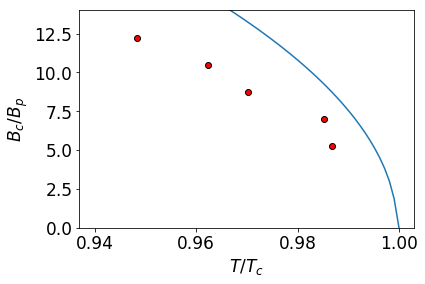

In [19]:
# Make plot:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.tick_params(labelsize=17);
ax.set_xlabel(r"$T / T_c$", size=17);
ax.set_ylabel(r"$B_c / B_p$", size=17);
plt.plot(np.array(Ts)/Tc, np.sqrt(2)*np.array(Bcs)/Delta0);
plt.scatter(Tdata, Bcdata, c='r', edgecolors='k');
ax.set_ylim(0, 14);

In [20]:
# Save figure:
fig.tight_layout();
fig.savefig("results/fig_Bc-T_{}_{}.pdf".format(material, datetime.now().strftime('%Y-%m-%d_%H:%M:%S')));

# Critical field as function of $\mu$ at a fixed temperature

In [11]:
# For the plot we make use of the data for MoS2 of Lu et al.
material = "MoS2";
SCmonolayer = SC.TMDmonolayerSC(material=material);
TKelvin = 0.5;
T = TKelvin * 8.617333262145e-5;

# Load the experimental data where the Hc is measured or expected:
Delta0sExp = []; BcsExp = [];
with open("LuMoS2_mu-B_{}K.csv".format(TKelvin), newline='') as f:
    csvlines = csv.reader(f, delimiter=',');
    for line in csvlines:
        Delta0sExp.append( T / float(line[0]) * 1.764);
        BcsExp.append( float(line[1]) );

# The corresponding chemical potential:
musExp = np.array([8.483230339817276, 6.995847216225854, 6.073513858041886])*np.pi*SCmonolayer.a;

# Now load the experimental data that indicates the mu-Delta0 trajectory:
muDataAll = []; Delta0DataAll = [];
datasets = ["LuMoS2.csv"];
for dataset in datasets:
    muData = []; Delta0Data = [];

    with open(dataset, newline='') as f:
        csvlines = csv.reader(f, delimiter=',');
        for line in csvlines:
            muData.append( float(line[0])*1e-2*np.pi*SCmonolayer.a); # Assuming n2D is in units of 10^14 cm^-2
            Delta0Data.append( float(line[1]) * 8.617333262145e-5 * 1.764 ); # Assuming Tc is in K

    muDataAll.append(muData); Delta0DataAll.append(Delta0Data);

# We now calculate the critical field at the trajectory using the available datasets:
BcsAll = [];
for setnr in range(len(datasets)):
    Bcs = [];
    for d in range(len(muDataAll[setnr])):
        print("Calculating Hc of datapoint ({}/{}) for dataset {}...".format(d+1, len(muDataAll[setnr]), setnr), end="\r");
        mu = muDataAll[setnr][d];
        Delta0 = Delta0DataAll[setnr][d];
        hwc = 20.0*Delta0;
        res = 500;

        ksplus, ksmin = SCmonolayer.generate_ks(mu, hwc, res);
        V = SCmonolayer.Vint(mu, ksplus, ksmin, Delta0);
        Bcs.append( np.sqrt(2)*SCmonolayer.findBc(mu, Delta0, ksplus, ksmin, V, T=T, maxfactor=200.0)/Delta0);
    BcsAll.append(Bcs);

In [75]:
# Save data
with open("results/Bc-mu_{}_{}.json".format(material, datetime.now().strftime('%Y-%m-%d_%H:%M:%S')), "w+") as f:
    jsoncontent = {"musExp": musExp.tolist(), "BcsExp": BcsExp, "muDataAll": muDataAll, "BcsAll": BcsAll};
    json.dump(jsoncontent, f);

In [ ]:
# Load data:
with open("results/Bc-mu_{}_{}.json".format(material, "date"), "r") as f:
    jsoncontent = json.load(jsoncontent);

musExp = jsoncontent["musExp"];
BcsExp = jsoncontent["BcsExp"];
muDataAll = jsoncontent["muDataAll"];
BcsAll = jsoncontent["BcsAll"];

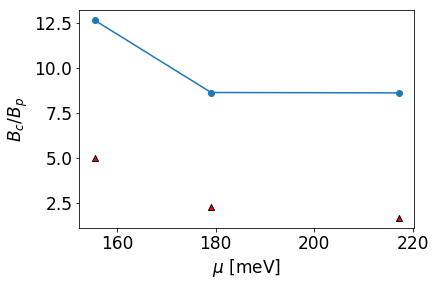

In [6]:
# Make plot:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.tick_params(labelsize=17);
ax.set_xlabel(r"$\mu$ [meV]", size=17);
ax.set_ylabel(r"$B_c / B_p$", size=17);

ax.scatter(musExp, np.array(BcsExp), marker='^', color='r', edgecolors='k');

for setnr in range(len(datasets)):
    ax.plot(np.array(muDataAll[setnr])[[0,1,3]]*1000, np.array(BcsAll[setnr])[[0,1,3]], 'o-');

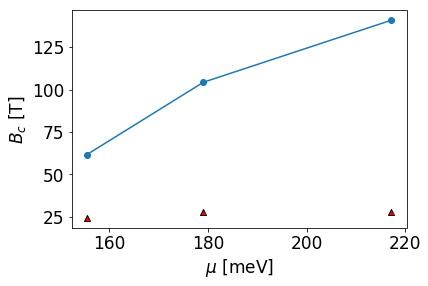

In [12]:
# Actual field instead of ratio:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.tick_params(labelsize=17);
ax.set_xlabel(r"$\mu$ [meV]", size=17);
ax.set_ylabel(r"$B_c$ [T]", size=17);

Delta0s = np.array(Delta0DataAll[0])[[0,1,3]];
ax.scatter(musExp, np.array(BcsExp)*Delta0s[::-1]/np.sqrt(2)/5.7883818012e-5, marker='^', color='r', edgecolors='k');

for setnr in range(len(datasets)):
    ax.plot(np.array(muDataAll[setnr])[[0,1,3]]*1000, np.array(BcsAll[setnr])[[0,1,3]]*Delta0s/np.sqrt(2)/5.7883818012e-5, 'o-');

In [7]:
# Save figure:
fig.tight_layout();
fig.savefig("results/fig_Bc-mu_{}_{}_K.pdf".format(material, datetime.now().strftime('%Y-%m-%d_%H:%M:%S'), Tkelvin));